### Readme
notebook que carga y analiza el fichero JSON con información de repositorios
los datos se han obtenido via API GraphQL y REST API de github

### Carga de librerías y fichero de datos. comprobaciones básicas

In [1]:
# imports de librerías requeridas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import json
from tabulate import tabulate
import locale

In [2]:
#pd.set_option('display.precision', 2)  # Configurar la precisión de decimales

# Configurar la visualización para que los números se muestren en formato europeo
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x).replace(',', 'X').replace('.', ',').replace('X', '.'))

In [3]:
DATA_FILE='D:\\Dev\\github-scrapping-02\\Data\\xmerge-metadata.json'

In [4]:
#compression = None if DATA_FILE.endswith('.json') else 'infer'
#df = pd.read_json(DATA_FILE, compression=compression)

# Abrimos y leemos el archivo JSON
with open(DATA_FILE, 'r') as f:
    repos = [json.loads(line) for line in f]


In [5]:
# Convertimos los datos a un DataFrame de pandas para mejor visualización
df = pd.json_normalize(repos)

In [6]:
df.head()

,name,description,stargazerCount,forkCount,createdAt,updatedAt,pushedAt,diskUsage,isArchived,isEmpty,...,issues.totalCount,forks.totalCount,assignableUsers.totalCount,deployments.totalCount,environments.totalCount,milestones.totalCount,releases.totalCount,pullRequests.totalCount,watchers.totalCount,licenseInfo
0,Parsr,"Transforms PDF, Documents and Images into Enri...",5755,306,2019-08-05T12:43:53Z,2024-09-01T17:24:35Z,2023-12-03T13:27:21Z,55148,False,False,...,163,305,4,0,0,0,26,504,81,NaN
1,Yet-Another-EfficientDet-Pytorch,The pytorch re-implement of the official effic...,5200,1268,2020-04-06T03:27:06Z,2024-08-22T08:04:26Z,2021-10-24T02:13:31Z,9068,False,False,...,716,1251,1,0,0,0,4,37,108,NaN
2,nit,Git of Web3 assets,4452,8,2022-04-20T08:21:14Z,2024-08-08T16:18:20Z,2024-07-29T14:17:11Z,548,False,False,...,26,8,4,0,0,0,4,13,12,NaN
3,new.css,A classless CSS framework to write modern webs...,3946,127,2020-05-03T03:18:57Z,2024-09-01T17:29:23Z,2024-03-16T08:40:48Z,310,False,False,...,40,112,1,100,2,0,1,43,39,NaN
4,golang-notes,Go source code analysis(zh-cn),3941,667,2018-04-04T05:21:51Z,2024-08-31T01:40:45Z,2022-07-18T09:30:00Z,8118,False,False,...,23,658,1,0,0,0,0,39,186,NaN


In [7]:
# crear copia de seguridad
df_copy=df.copy()

In [8]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37133 entries, 0 to 37132
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        37133 non-null  object 
 1   description                 35042 non-null  object 
 2   stargazerCount              37133 non-null  int64  
 3   forkCount                   37133 non-null  int64  
 4   createdAt                   37133 non-null  object 
 5   updatedAt                   37133 non-null  object 
 6   pushedAt                    37133 non-null  object 
 7   diskUsage                   37133 non-null  int64  
 8   isArchived                  37133 non-null  bool   
 9   isEmpty                     37133 non-null  bool   
 10  isFork                      37133 non-null  bool   
 11  isInOrganization            37133 non-null  bool   
 12  isPrivate                   37133 non-null  bool   
 13  isTemplate                  371

In [9]:
# Contar el número de columnas
num_columns = df_copy.shape[1]

print(f"El número de columnas en el DataFrame es: {num_columns}")

El número de columnas en el DataFrame es: 36


In [10]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37133 entries, 0 to 37132
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        37133 non-null  object 
 1   description                 35042 non-null  object 
 2   stargazerCount              37133 non-null  int64  
 3   forkCount                   37133 non-null  int64  
 4   createdAt                   37133 non-null  object 
 5   updatedAt                   37133 non-null  object 
 6   pushedAt                    37133 non-null  object 
 7   diskUsage                   37133 non-null  int64  
 8   isArchived                  37133 non-null  bool   
 9   isEmpty                     37133 non-null  bool   
 10  isFork                      37133 non-null  bool   
 11  isInOrganization            37133 non-null  bool   
 12  isPrivate                   37133 non-null  bool   
 13  isTemplate                  371

In [11]:
df_copy.drop(columns=['licenseInfo'], inplace=True)


In [12]:
# Conversión de las columnas a tipo datetime
df_copy['createdAt'] = pd.to_datetime(df_copy['createdAt'])
df_copy['updatedAt'] = pd.to_datetime(df_copy['updatedAt'])
df_copy['pushedAt'] = pd.to_datetime(df_copy['pushedAt'])

# Verificar los tipos de datos
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37133 entries, 0 to 37132
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   name                        37133 non-null  object             
 1   description                 35042 non-null  object             
 2   stargazerCount              37133 non-null  int64              
 3   forkCount                   37133 non-null  int64              
 4   createdAt                   37133 non-null  datetime64[ns, UTC]
 5   updatedAt                   37133 non-null  datetime64[ns, UTC]
 6   pushedAt                    37133 non-null  datetime64[ns, UTC]
 7   diskUsage                   37133 non-null  int64              
 8   isArchived                  37133 non-null  bool               
 9   isEmpty                     37133 non-null  bool               
 10  isFork                      37133 non-null  bool          

### Calidad del dato

In [13]:
print(len(df_copy.columns))

35


In [14]:
# duplicados sobre clave primaria creada a partir de owner.login y name:
# Crear la nueva columna 'reponame' combinando 'owner.login' y 'name'
df_copy['reponame'] = df_copy['owner.login'] + '/' + df_copy['name']

In [15]:
df_copy['reponame'].head()

0                             axa-group/Parsr
1    zylo117/Yet-Another-EfficientDet-Pytorch
2                         numbersprotocol/nit
3                                  xz/new.css
4                         cch123/golang-notes
Name: reponame, dtype: object

In [16]:
# Duplicados
# Obtener los duplicados en la columna 'reponame'
duplicados = df_copy[df_copy.duplicated(subset='reponame', keep=False)]

if not duplicados.empty:
    # Agrupar por 'reponame' y mostrar índices de duplicados y el original
    for valor in duplicados['reponame'].unique():
        indices_duplicados = df_copy[df_copy['reponame'] == valor].index
        
        # Filtrar el índice del original
        indice_original = indices_duplicados[0]  # Primer índice como original
        indices_sin_original = indices_duplicados[1:]  # Índices de los duplicados sin el original

        print(f"Duplicado: '{valor}' en índices: {list(indices_sin_original)}")
        print(f"Original: '{valor}' en índice: {indice_original}\n")

        # Eliminar duplicados uno a uno
        for indice in indices_sin_original:
            df_copy = df_copy.drop(indice).reset_index(drop=True)
            print(f"Eliminado el duplicado en índice: {indice}")

else:
    print("No se encontraron registros duplicados en la columna 'reponame'.")


Duplicado: 'skyzh/mini-lsm' en índices: [16982]
Original: 'skyzh/mini-lsm' en índice: 16834

Eliminado el duplicado en índice: 16982
Duplicado: 'phoenixsky/fun_android_flutter' en índices: [16982]
Original: 'phoenixsky/fun_android_flutter' en índice: 16835

Eliminado el duplicado en índice: 16982
Duplicado: 'mmcloughlin/avo' en índices: [16985]
Original: 'mmcloughlin/avo' en índice: 16836

Eliminado el duplicado en índice: 16985
Duplicado: '52bp/52bp.github.io' en índices: [29338]
Original: '52bp/52bp.github.io' en índice: 29169

Eliminado el duplicado en índice: 29338
Duplicado: 'py2many/py2many' en índices: [29281]
Original: 'py2many/py2many' en índice: 29171

Eliminado el duplicado en índice: 29281
Duplicado: 'facebookresearch/ContrastiveSceneContexts' en índices: [29324]
Original: 'facebookresearch/ContrastiveSceneContexts' en índice: 29177

Eliminado el duplicado en índice: 29324
Duplicado: 'tretapey/svelte-pwa' en índices: [29324]
Original: 'tretapey/svelte-pwa' en índice: 29178


In [17]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37120 entries, 0 to 37119
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   name                        37120 non-null  object             
 1   description                 35030 non-null  object             
 2   stargazerCount              37120 non-null  int64              
 3   forkCount                   37120 non-null  int64              
 4   createdAt                   37120 non-null  datetime64[ns, UTC]
 5   updatedAt                   37120 non-null  datetime64[ns, UTC]
 6   pushedAt                    37120 non-null  datetime64[ns, UTC]
 7   diskUsage                   37120 non-null  int64              
 8   isArchived                  37120 non-null  bool               
 9   isEmpty                     37120 non-null  bool               
 10  isFork                      37120 non-null  bool          

### df_copy['languages.nodes'].head()

### Guardar df limpio

In [18]:
#df_copy.to_json('D:\\Dev\\github-scrapping-02\\Data\\df_clean_analisis_categoricas.json', orient='records', lines=True)

### Exploración

In [19]:
df_copy['languages.nodes'].head()

0    [{'name': 'JavaScript'}, {'name': 'Shell'}, {'...
1    [{'name': 'Python'}, {'name': 'Jupyter Noteboo...
2     [{'name': 'JavaScript'}, {'name': 'TypeScript'}]
3                  [{'name': 'HTML'}, {'name': 'CSS'}]
4    [{'name': 'Go'}, {'name': 'HTML'}, {'name': 'S...
Name: languages.nodes, dtype: object

In [20]:
# Contar el número de lenguajes por repositorio
df_copy['language_count'] = df_copy['languages.nodes'].apply(lambda x: len(x))

# Mostrar los resultados
print(df_copy[['languages.nodes', 'language_count']].head())


                                     languages.nodes  language_count
0  [{'name': 'JavaScript'}, {'name': 'Shell'}, {'...               5
1  [{'name': 'Python'}, {'name': 'Jupyter Noteboo...               2
2   [{'name': 'JavaScript'}, {'name': 'TypeScript'}]               2
3                [{'name': 'HTML'}, {'name': 'CSS'}]               2
4  [{'name': 'Go'}, {'name': 'HTML'}, {'name': 'S...               4


count   37.120,00
mean         3,13
std          2,25
min          1,00
25%          1,00
50%          2,00
75%          4,00
max         10,00
Name: language_count, dtype: float64


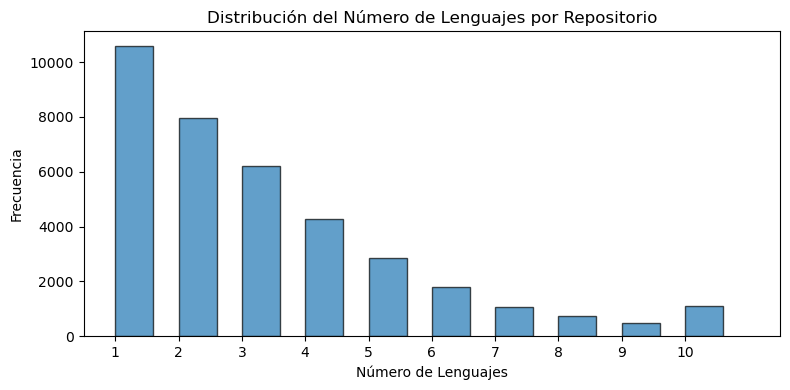

In [21]:
# Imprimir las estadísticas descriptivas del total de lenguajes por repositorio
print(df_copy['language_count'].describe())

# Visualizamos el histograma
plt.figure(figsize=(8, 4))
plt.hist(df_copy['language_count'], bins=range(1, df_copy['language_count'].max() + 2), edgecolor='black', alpha=0.7, width=0.6)
plt.title('Distribución del Número de Lenguajes por Repositorio')
plt.xlabel('Número de Lenguajes')
plt.ylabel('Frecuencia')
plt.xticks(range(1, df_copy['language_count'].max() + 1))
plt.grid(False)  # Desactivamos las líneas del grid
plt.tight_layout()  # Ajustamos el layout para evitar solapamientos
plt.show()


In [22]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37120 entries, 0 to 37119
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   name                        37120 non-null  object             
 1   description                 35030 non-null  object             
 2   stargazerCount              37120 non-null  int64              
 3   forkCount                   37120 non-null  int64              
 4   createdAt                   37120 non-null  datetime64[ns, UTC]
 5   updatedAt                   37120 non-null  datetime64[ns, UTC]
 6   pushedAt                    37120 non-null  datetime64[ns, UTC]
 7   diskUsage                   37120 non-null  int64              
 8   isArchived                  37120 non-null  bool               
 9   isEmpty                     37120 non-null  bool               
 10  isFork                      37120 non-null  bool          

### Variables categóricas


In [23]:
df_copy['languages.nodes'].head(10)

0    [{'name': 'JavaScript'}, {'name': 'Shell'}, {'...
1    [{'name': 'Python'}, {'name': 'Jupyter Noteboo...
2     [{'name': 'JavaScript'}, {'name': 'TypeScript'}]
3                  [{'name': 'HTML'}, {'name': 'CSS'}]
4    [{'name': 'Go'}, {'name': 'HTML'}, {'name': 'S...
5              [{'name': 'Shell'}, {'name': 'Python'}]
6                       [{'name': 'Jupyter Notebook'}]
7    [{'name': 'Go'}, {'name': 'Makefile'}, {'name'...
8                                 [{'name': 'Python'}]
9                                 [{'name': 'Python'}]
Name: languages.nodes, dtype: object

In [24]:
# Identificar las columnas categóricas y booleanas
categorical_cols = df_copy.select_dtypes(include=['object']).columns
boolean_cols = df_copy.select_dtypes(include=['bool']).columns

print("Columnas categóricas (object):", categorical_cols, "número de categóricas: ", len(categorical_cols))
print("Columnas booleanas:", boolean_cols, "número de boolean: ", len(boolean_cols))


Columnas categóricas (object): Index(['name', 'description', 'owner.login', 'owner.url', 'licenseInfo.name',
       'primaryLanguage.name', 'languages.nodes', 'reponame'],
      dtype='object') número de categóricas:  8
Columnas booleanas: Index(['isArchived', 'isEmpty', 'isFork', 'isInOrganization', 'isPrivate',
       'isTemplate', 'hasIssuesEnabled', 'hasWikiEnabled',
       'hasProjectsEnabled', 'hasSponsorshipsEnabled', 'mergeCommitAllowed',
       'viewerCanSubscribe'],
      dtype='object') número de boolean:  12


In [25]:
# Resumen estadístico para las variables categóricas (de tipo object)
# Esto proporciona un resumen como conteo, número de valores únicos, valor más frecuente y su frecuencia
df_copy[categorical_cols].describe()

,name,description,owner.login,owner.url,licenseInfo.name,primaryLanguage.name,languages.nodes,reponame
count,37120,35030,37120,37120,28325,37120,37120,37120
unique,36186,34982,27486,27486,38,205,12654,37120
top,blog,A font file available from Google Fonts.,microsoft,https://github.com/microsoft,MIT License,Python,[{'name': 'Python'}],axa-group/Parsr
freq,20,5,195,195,14946,8522,3603,1


In [26]:
# Análisis de valores nulos en columnas categóricas
missing_categorical = df_copy[categorical_cols].isnull().sum()
print("Valores faltantes en variables categóricas:")
print(missing_categorical[missing_categorical > 0])


Valores faltantes en variables categóricas:
description         2090
licenseInfo.name    8795
dtype: int64


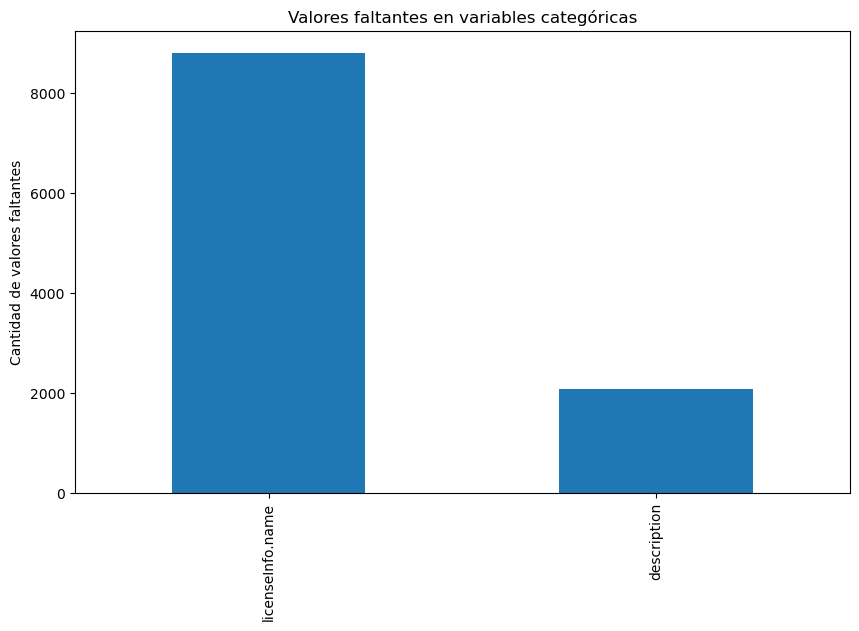

In [27]:
# Visualizar los valores faltantes con un gráfico de barras
plt.figure(figsize=(10, 6))
missing_categorical[missing_categorical > 0].sort_values(ascending=False).plot(kind='bar')
plt.title('Valores faltantes en variables categóricas')
plt.ylabel('Cantidad de valores faltantes')
plt.show()


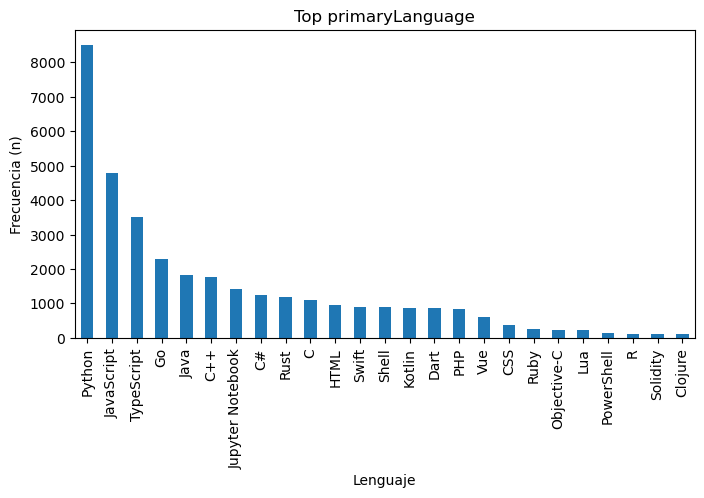

In [28]:
# Ejemplo de análisis detallado de una variable categórica específica
# Usaremos la columna 'primaryLanguage.name' para ver la distribución de los lenguajes primarios
plt.figure(figsize=(8, 4))
df_copy['primaryLanguage.name'].value_counts().head(25).plot(kind='bar')
plt.title('Top primaryLanguage')
plt.xlabel('Lenguaje')
plt.ylabel('Frecuencia (n)')
plt.show()


In [29]:
# Mostrar la cantidad de valores únicos para cada columna categórica
for col in categorical_cols:
    print(f"Columna: {col}")
    print(df_copy[col].value_counts().head(10))  # Mostrar los 10 valores más comunes
    print("\n")


Columna: name
name
blog        20
core        15
examples    14
dotfiles    13
leetcode    12
cli          9
website      7
ui           7
app          7
blogs        7
Name: count, dtype: int64


Columna: description
description
A font file available from Google Fonts.                                            5
Explore something new                                                               5
Created with CodeSandbox                                                            3
Migrated:                                                                           3
[ECCV 2018] AMC: AutoML for Model Compression and Acceleration on Mobile Devices    2
https://youtu.be/h-igXZCCrrc                                                        2
Superseded by https://github.com/ProtonVPN/ios-mac-app                              2
Home Assistant Configuration                                                        2
My neovim config                                                                  

### Var Boolean

In [30]:
# Resumen estadístico de las variables booleanas
df_copy[boolean_cols].describe()


,isArchived,isEmpty,isFork,isInOrganization,isPrivate,isTemplate,hasIssuesEnabled,hasWikiEnabled,hasProjectsEnabled,hasSponsorshipsEnabled,mergeCommitAllowed,viewerCanSubscribe
count,37120,37120,37120,37120,37120,37120,37120,37120,37120,37120,37120,37120
unique,2,1,1,2,1,2,2,2,2,2,2,1
top,False,False,False,False,False,False,True,True,True,False,True,True
freq,34116,37120,37120,24665,37120,36703,36223,30337,31923,32865,34123,37120


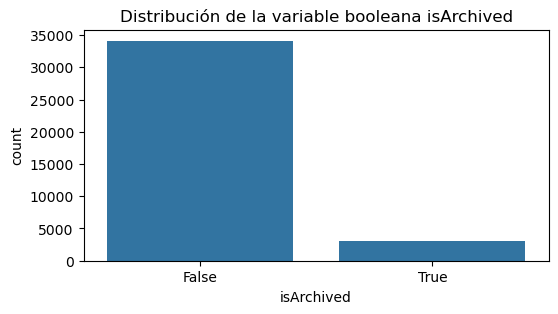

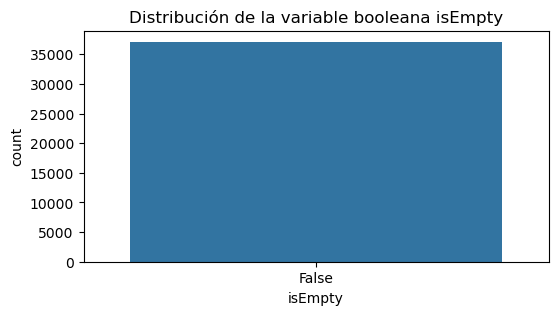

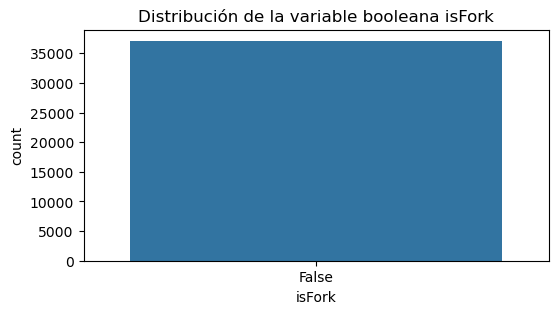

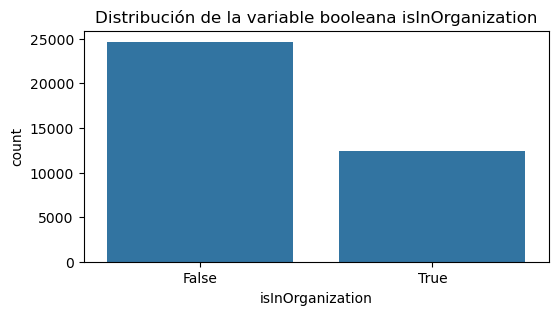

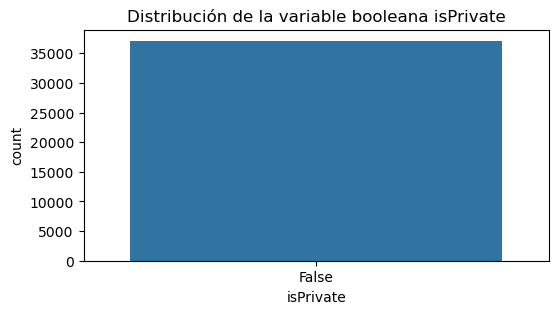

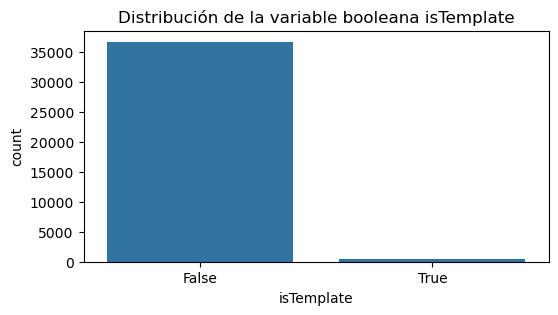

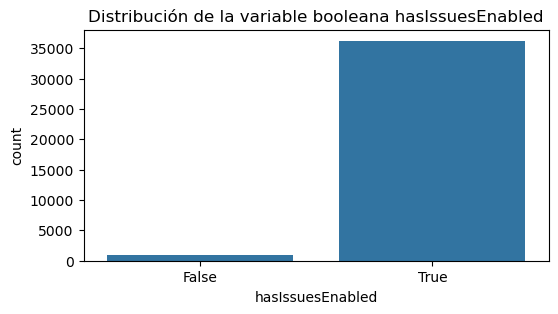

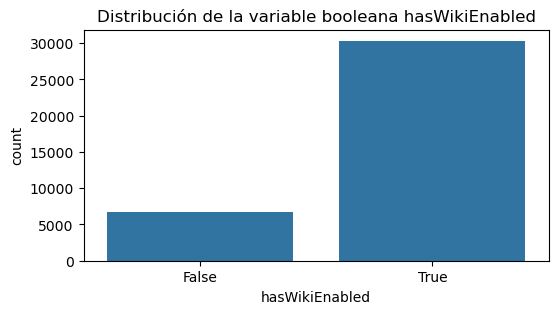

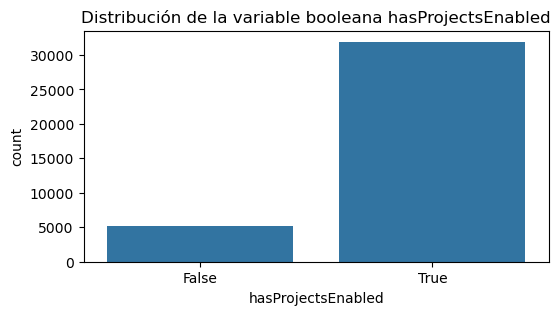

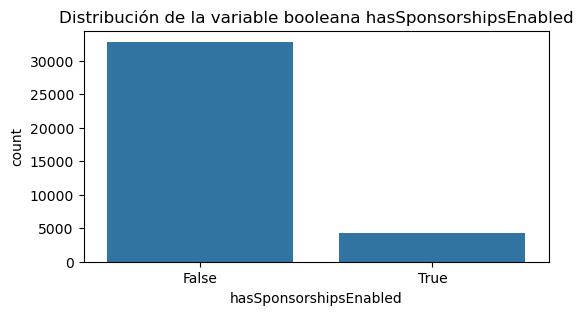

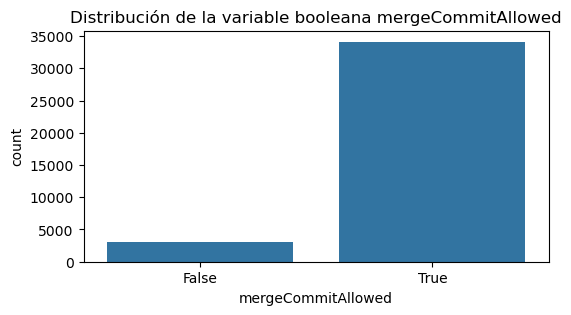

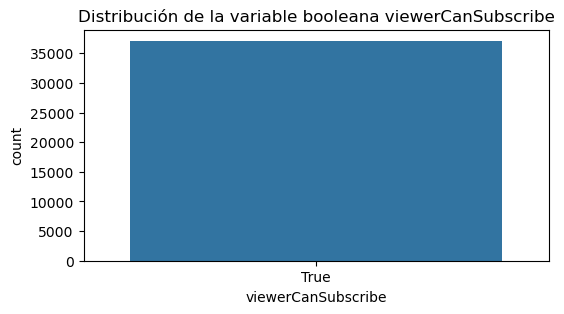

In [31]:
# Visualizar la distribución de cada variable booleana usando gráficos de barras
for col in boolean_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=df_copy, x=col)
    plt.title(f"Distribución de la variable booleana {col}")
    plt.show()


In [32]:
# Columnas identificadas como arrays o diccionarios (ejemplo: 'languages.nodes')
complex_cols = ['languages.nodes']

# Para manejar estas columnas, podemos analizar la longitud de los arrays o la estructura de los diccionarios
for col in complex_cols:
    print(f"Análisis de la columna {col}:")
    # Mostrar un ejemplo del contenido
    print(df_copy[col].apply(lambda x: type(x)).value_counts())  # Tipo de los valores en la columna
    # Si contiene listas/arrays, podemos analizar la longitud de cada uno
    if isinstance(df_copy[col].iloc[0], list):
        print(df_copy[col].apply(len).describe())  # Resumen de las longitudes de los arrays
    print("\n")


Análisis de la columna languages.nodes:
languages.nodes
<class 'list'>    37120
Name: count, dtype: int64
count   37.120,00
mean         3,13
std          2,25
min          1,00
25%          1,00
50%          2,00
75%          4,00
max         10,00
Name: languages.nodes, dtype: float64




### Frecuencias absolutas y relativas

In [33]:
# Función para generar una tabla de frecuencias absolutas y relativas
def generar_tabla_frecuencias(df, col):
    # Frecuencia absoluta
    freq_abs = df[col].value_counts()
    
    # Frecuencia relativa
    freq_rel = df[col].value_counts(normalize=True) * 100
    
    # Combinar en una sola tabla
    tabla_frecuencias = pd.DataFrame({
        'Frecuencia_Absoluta': freq_abs,
        'Frecuencia_Relativa (%)': freq_rel
    })
    
    return tabla_frecuencias

# Generar y mostrar tablas para cada variable categórica
for col in categorical_cols:
    #print(f"{col}")
    print(generar_tabla_frecuencias(df_copy, col))
    print("\n")


                                      Frecuencia_Absoluta  \
name                                                        
blog                                                   20   
core                                                   15   
examples                                               14   
dotfiles                                               13   
leetcode                                               12   
...                                                   ...   
jsoncat                                                 1   
hy-react-web-music                                      1   
Semantic-Segmentation-Loss-Functions                    1   
docbao                                                  1   
JavaScript-Is-Weird                                     1   

                                      Frecuencia_Relativa (%)  
name                                                           
blog                                                     0,05  
core          

In [34]:
# Generar y mostrar tablas de frecuencias para las variables booleanas
for col in boolean_cols:
    #print(f"{col}")
    print(generar_tabla_frecuencias(df_copy, col))
    print("\n")


            Frecuencia_Absoluta  Frecuencia_Relativa (%)
isArchived                                              
False                     34116                    91,91
True                       3004                     8,09


         Frecuencia_Absoluta  Frecuencia_Relativa (%)
isEmpty                                              
False                  37120                   100,00


        Frecuencia_Absoluta  Frecuencia_Relativa (%)
isFork                                              
False                 37120                   100,00


                  Frecuencia_Absoluta  Frecuencia_Relativa (%)
isInOrganization                                              
False                           24665                    66,45
True                            12455                    33,55


           Frecuencia_Absoluta  Frecuencia_Relativa (%)
isPrivate                                              
False                    37120                   100,00


            Frecuenci

### Relación entre variables, correlación, etc.

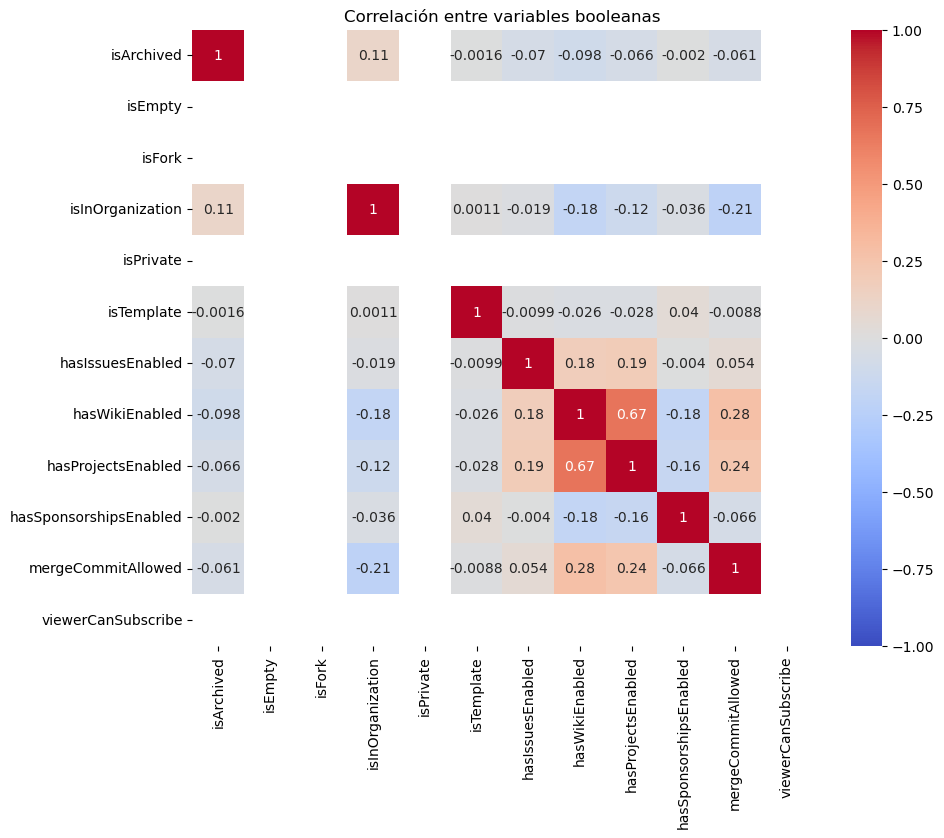

In [35]:
# Calcular la matriz de correlación entre las variables booleanas
plt.figure(figsize=(10, 8))
sns.heatmap(df_copy[boolean_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlación entre variables booleanas')
plt.show()


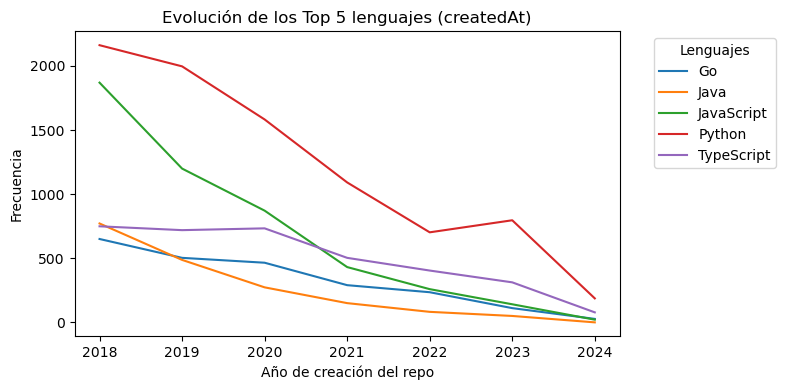

In [36]:
# Lenaguajes vs fecha de creación. Evolución de los Top 5



# Convertir la columna 'createdAt' a solo el año
df_copy['year'] = df_copy['createdAt'].dt.year

# Obtener los 5 lenguajes más comunes
top_5_languages = df_copy['primaryLanguage.name'].value_counts().nlargest(5).index

# Filtrar solo los repositorios con esos 5 lenguajes
df_top_5_languages = df_copy[df_copy['primaryLanguage.name'].isin(top_5_languages)]

# Agrupar por año y lenguaje, y contar el número de repos creados en cada combinación
repos_por_año = df_top_5_languages.groupby(['year', 'primaryLanguage.name']).size().unstack(fill_value=0)

# Crear el gráfico de líneas
plt.figure(figsize=(8, 4))
repos_por_año.plot(kind='line', ax=plt.gca())

# Añadir etiquetas y título
plt.title('Evolución de los Top 5 lenguajes (createdAt)')
plt.xlabel('Año de creación del repo')
plt.ylabel('Frecuencia')
plt.legend(title='Lenguajes', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


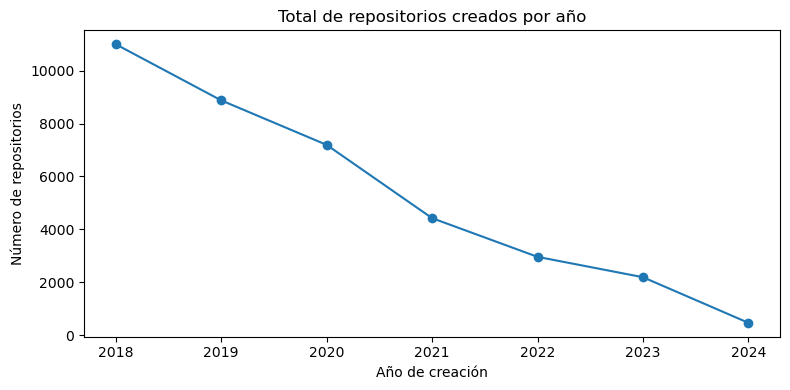

In [37]:
# Contar el número total de repositorios creados por año
repos_totales_por_año = df_copy.groupby('year').size()

# Crear el gráfico del número total de repositorios creados por año
plt.figure(figsize=(8, 4))
repos_totales_por_año.plot(kind='line', marker='o')

# Añadir etiquetas y título
plt.title('Total de repositorios creados por año')
plt.xlabel('Año de creación')
plt.ylabel('Número de repositorios')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


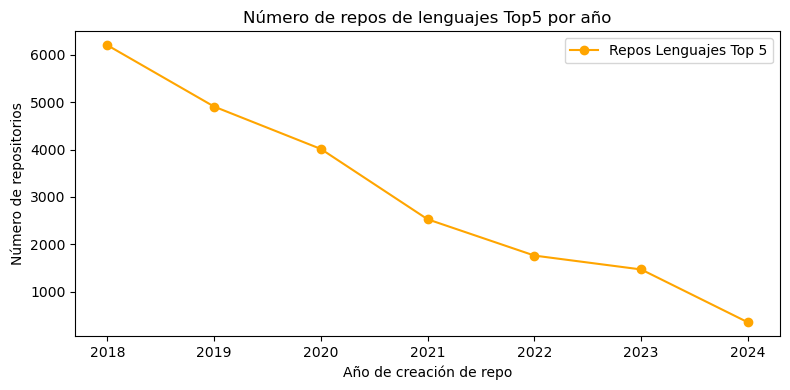

In [38]:
# Crear un dataframe para almacenar el top 5 lenguajes por cada año
top_5_lenguajes_por_año = df_copy.groupby(['year', 'primaryLanguage.name']).size().unstack(fill_value=0)

# Para cada año, obtener el top 5 lenguajes más utilizados
top_5_años_lenguajes = top_5_lenguajes_por_año.apply(lambda row: row.nlargest(5).index.tolist(), axis=1)

# Crear una tabla para mostrar cuántos repos se crean de lenguajes top 5 cada año
repos_top_5_por_año = top_5_lenguajes_por_año.apply(lambda row: row[top_5_años_lenguajes.loc[row.name]].sum(), axis=1)

# Crear el gráfico del número total de repos de lenguajes top 5 por año
plt.figure(figsize=(8, 4))
repos_top_5_por_año.plot(kind='line', marker='o', color='orange', label='Repos Lenguajes Top 5')

# Añadir etiquetas y título
plt.title('Número de repos de lenguajes Top5 por año')
plt.xlabel('Año de creación de repo')
plt.ylabel('Número de repositorios')

# Mostrar el gráfico
plt.tight_layout()
plt.legend()
plt.show()


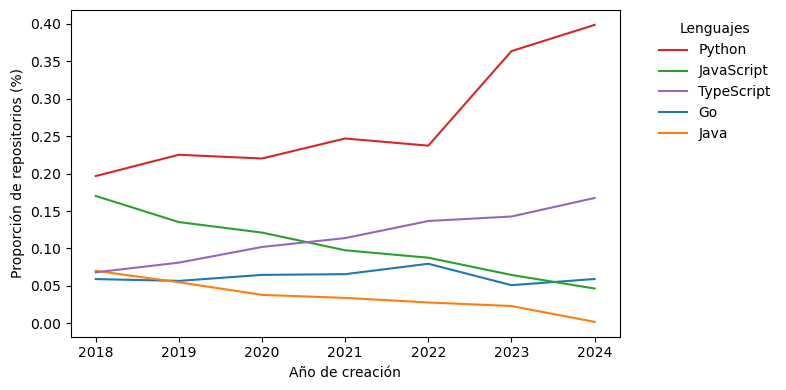

In [49]:
# Frecuencia relativa de los TOP5 lenguajes
# Normalizando dividiendo por el total de cada año


import matplotlib.pyplot as plt

# Convertir la columna 'createdAt' a solo el año
df_copy['year'] = df_copy['createdAt'].dt.year

# Obtener los 5 lenguajes más comunes
top_5_languages = df_copy['primaryLanguage.name'].value_counts().nlargest(5).index

# Filtrar solo los repositorios con esos 5 lenguajes
df_top_5_languages = df_copy[df_copy['primaryLanguage.name'].isin(top_5_languages)]

# Agrupar por año y lenguaje, y contar el número de repos creados en cada combinación
repos_por_año = df_top_5_languages.groupby(['year', 'primaryLanguage.name']).size().unstack(fill_value=0)

# Obtener el número total de repositorios creados por año
repos_totales_por_año = df_copy.groupby('year').size()

# Normalizar las frecuencias de los lenguajes, dividiendo por el total de repos creados en cada año
repos_por_año_relativo = repos_por_año.div(repos_totales_por_año, axis=0)

# Crear el gráfico de líneas con frecuencias relativas
plt.figure(figsize=(8, 4))

# Trazar las líneas
ax = repos_por_año_relativo.plot(kind='line', ax=plt.gca())

# Añadir etiquetas y título
#plt.title('Evolución relativa de los top 5 lenguajes por año de creación de repos')
plt.xlabel('Año de creación')
plt.ylabel('Proporción de repositorios (%)')

# Obtener el orden correcto de la leyenda basado en las líneas trazadas
handles, labels = ax.get_legend_handles_labels()

# Crear un nuevo orden para la leyenda basado en el orden de las líneas
order = [3, 2, 4, 0, 1] # Ajusta esto si el orden de las líneas cambia
plt.legend([handles[i] for i in order], [labels[i] for i in order], title='Lenguajes', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

# Mostrar el gráfico
plt.tight_layout()
plt.show()






In [40]:
# Relación entre variables

from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

# Variables de interés
variables = ['hasProjectsEnabled', 'primaryLanguage.name', 'isInOrganization', 'hasWikiEnabled', 'hasSponsorshipsEnabled', 'mergeCommitAllowed']

# Codificar la variable categórica primaryLanguage.name con LabelEncoder
df_copy_encoded = df_copy.copy()
label_encoder = LabelEncoder()
df_copy_encoded['primaryLanguage.name'] = label_encoder.fit_transform(df_copy_encoded['primaryLanguage.name'])

# 1. Tablas de contingencia
for var1 in variables:
    for var2 in variables:
        if var1 != var2:
            contingency_table = pd.crosstab(df_copy_encoded[var1], df_copy_encoded[var2])
            print(f"\nTabla de contingencia entre {var1} y {var2}:\n", contingency_table)

# 2. Prueba de Chi-cuadrado
def chi2_test(var1, var2):
    contingency_table = pd.crosstab(df_copy_encoded[var1], df_copy_encoded[var2])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    return chi2, p

for var1 in variables:
    for var2 in variables:
        if var1 != var2:
            chi2, p = chi2_test(var1, var2)
            print(f"\nChi-cuadrado entre {var1} y {var2}: Chi2 = {chi2:.4f}, p-valor = {p:.4f}")

# 3. Cálculo de Cramér's V
def cramers_v(var1, var2):
    contingency_table = pd.crosstab(df_copy_encoded[var1], df_copy_encoded[var2])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    return np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

for var1 in variables:
    for var2 in variables:
        if var1 != var2:
            v = cramers_v(var1, var2)
            print(f"\nCramér's V entre {var1} y {var2}: {v:.4f}")

# 4. Correlación para variables booleanas
boolean_vars = ['hasProjectsEnabled', 'isInOrganization', 'hasWikiEnabled', 'hasSponsorshipsEnabled', 'mergeCommitAllowed']
correlation_matrix = df_copy_encoded[boolean_vars].corr()



Tabla de contingencia entre hasProjectsEnabled y primaryLanguage.name:
 primaryLanguage.name  0    1    2    3    4    5    6    7    8    9    ...  \
hasProjectsEnabled                                                      ...   
False                   1    0    0    1    2    1    0    0    0    1  ...   
True                    0    1    5    0    9    1    1    2    2    1  ...   

primaryLanguage.name  195  196  197  198  199  200  201  202  203  204  
hasProjectsEnabled                                                      
False                   0    0    0    0    0    1    4    1    0    0  
True                    1    1    2    4    1    1   13    1    1    1  

[2 rows x 205 columns]

Tabla de contingencia entre hasProjectsEnabled y isInOrganization:
 isInOrganization    False  True 
hasProjectsEnabled              
False                2728   2469
True                21937   9986

Tabla de contingencia entre hasProjectsEnabled y hasWikiEnabled:
 hasWikiEnabled      False 

In [41]:
# Validad supuestos adecuados para chi2

# Variables a analizar
variables = [
    'hasProjectsEnabled',
    'isInOrganization',
    'hasSponsorshipsEnabled',
    'primaryLanguage.name',
    'mergeCommitAllowed',
    'hasWikiEnabled'
]

# Función para verificar los supuestos
def verificar_supuestos_resumido(df, vars):
    resultados = []  # Lista para almacenar resultados

    for i in range(len(vars)):
        for j in range(i + 1, len(vars)):
            # Crear tabla de contingencia
            tabla_contingencia = pd.crosstab(df[vars[i]], df[vars[j]])
            
            # Calcular chi-cuadrado
            chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
            
            # Verificación de los supuestos
            cumple_supuestos = np.all(expected >= 1) and np.sum(expected < 5) <= 0.2 * expected.size
            
            # Almacenar resultado
            resultados.append({
                'Variable 1': vars[i],
                'Variable 2': vars[j],
                'Estadístico chi-cuadrado': chi2,
                'p-valor': p,
                'Cumple supuestos': cumple_supuestos
            })
    
    # Crear un DataFrame de resultados
    resultados_df = pd.DataFrame(resultados)
    return resultados_df

# Ejecutar la función y mostrar resultados resumidos
resultados_resumidos = verificar_supuestos_resumido(df_copy, variables)
print(resultados_resumidos)


                Variable 1              Variable 2  Estadístico chi-cuadrado  \
0       hasProjectsEnabled        isInOrganization                    527,11   
1       hasProjectsEnabled  hasSponsorshipsEnabled                    994,91   
2       hasProjectsEnabled    primaryLanguage.name                  1.173,45   
3       hasProjectsEnabled      mergeCommitAllowed                  2.136,77   
4       hasProjectsEnabled          hasWikiEnabled                 16.482,50   
5         isInOrganization  hasSponsorshipsEnabled                     47,24   
6         isInOrganization    primaryLanguage.name                  1.130,95   
7         isInOrganization      mergeCommitAllowed                  1.700,15   
8         isInOrganization          hasWikiEnabled                  1.199,49   
9   hasSponsorshipsEnabled    primaryLanguage.name                  1.123,20   
10  hasSponsorshipsEnabled      mergeCommitAllowed                    160,68   
11  hasSponsorshipsEnabled          hasW

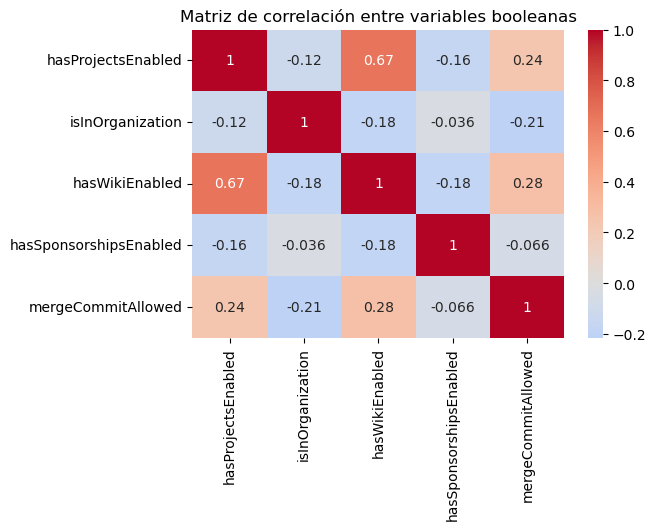

In [42]:
# Mostrar la matriz de correlación
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación entre variables booleanas')
plt.show()

In [43]:
# prueba de permutación 
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# Función para realizar la prueba de permutación
def permutation_test(data, var1, var2, num_permutations=1000):
    # Crear tabla de contingencia
    contingency_table = pd.crosstab(data[var1], data[var2])
    observed_stat = chi2_contingency(contingency_table)[0]
    
    # Concatenar las dos columnas para permutar
    combined = np.concatenate([data[var1].values, data[var2].values])
    count = 0
    
    for _ in range(num_permutations):
        # Mezclar las etiquetas
        np.random.shuffle(combined)
        # Crear nuevas columnas permutadas
        new_var1 = combined[:len(data[var1])]
        new_var2 = combined[len(data[var1]):]
        
        # Calcular la tabla de contingencia
        new_contingency_table = pd.crosstab(new_var1, new_var2)
        new_stat = chi2_contingency(new_contingency_table)[0]
        
        # Contar cuántas veces la estadística permutada es mayor o igual a la observada
        if new_stat >= observed_stat:
            count += 1
    
    # Calcular el valor p
    p_value = count / num_permutations
    return observed_stat, p_value

# Suponiendo que df_copy_encoded es tu DataFrame con las variables codificadas
variables_of_interest = [
    ('hasProjectsEnabled', 'primaryLanguage.name'),
    ('isInOrganization', 'primaryLanguage.name'),
    ('hasSponsorshipsEnabled', 'primaryLanguage.name'),
    ('primaryLanguage.name', 'mergeCommitAllowed'),
    ('primaryLanguage.name', 'hasWikiEnabled')
]

# Realizar las pruebas de permutación
for var1, var2 in variables_of_interest:
    observed_stat, p_value = permutation_test(df_copy_encoded, var1, var2)
    print(f'Prueba de permutación entre {var1} y {var2}: Estadística observada = {observed_stat:.4f}, p-valor = {p_value:.4f}')


Prueba de permutación entre hasProjectsEnabled y primaryLanguage.name: Estadística observada = 1173.4493, p-valor = 1.0000
Prueba de permutación entre isInOrganization y primaryLanguage.name: Estadística observada = 1130.9514, p-valor = 1.0000
Prueba de permutación entre hasSponsorshipsEnabled y primaryLanguage.name: Estadística observada = 1123.1988, p-valor = 1.0000
Prueba de permutación entre primaryLanguage.name y mergeCommitAllowed: Estadística observada = 1366.6980, p-valor = 1.0000
Prueba de permutación entre primaryLanguage.name y hasWikiEnabled: Estadística observada = 1143.2933, p-valor = 1.0000


In [44]:
# prueba de bootstraping para observar la variabilidad de una estadística


# Variables a analizar
variables = [
    'hasProjectsEnabled',
    'isInOrganization',
    'hasSponsorshipsEnabled',
    'primaryLanguage.name',
    'mergeCommitAllowed',
    'hasWikiEnabled'
]

# Función de bootstrapping
def bootstrap(data, num_samples=1000):
    # Almacena las medias de las muestras bootstrap
    boot_means = []
    
    for _ in range(num_samples):
        sample = np.random.choice(data, size=len(data), replace=True)  # Muestra con reemplazo
        boot_means.append(np.mean(sample))
        
    return boot_means

# Datos de ejemplo
#data = df_copy_encoded['hasProjectsEnabled']  # Cambia esto por tus datos

for var in variables:
    data = df_copy_encoded[var]
    # Ejecutar bootstrapping
    boot_means = bootstrap(data, num_samples=1000)

    # Calcular el intervalo de confianza del 95%
    lower_bound = np.percentile(boot_means, 2.5)
    upper_bound = np.percentile(boot_means, 97.5)
    
    print(f'Intervalo de confianza del 95% para la media de {var}: ({lower_bound:.4f}, {upper_bound:.4f})')


Intervalo de confianza del 95% para la media de hasProjectsEnabled: (0.8565, 0.8639)
Intervalo de confianza del 95% para la media de isInOrganization: (0.3309, 0.3402)
Intervalo de confianza del 95% para la media de hasSponsorshipsEnabled: (0.1115, 0.1179)
Intervalo de confianza del 95% para la media de primaryLanguage.name: (106.7505, 107.7224)
Intervalo de confianza del 95% para la media de mergeCommitAllowed: (0.9168, 0.9219)
Intervalo de confianza del 95% para la media de hasWikiEnabled: (0.8134, 0.8214)



Tabla de contingencia entre hasProjectsEnabled y isInOrganization:

isInOrganization    False   True    All
hasProjectsEnabled                     
False                2728   2469   5197
True                21937   9986  31923
All                 24665  12455  37120


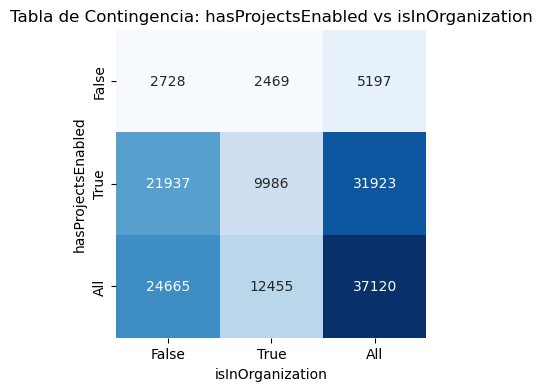

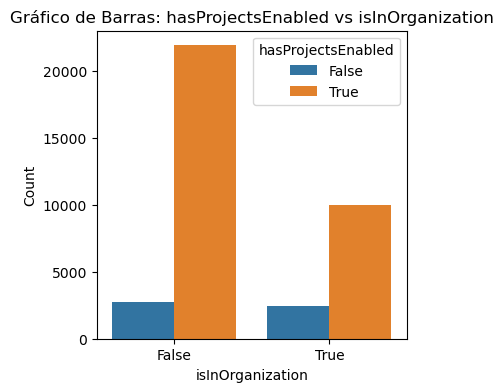


Tabla de contingencia entre hasProjectsEnabled y hasSponsorshipsEnabled:

hasSponsorshipsEnabled  False  True    All
hasProjectsEnabled                        
False                    3929  1268   5197
True                    28936  2987  31923
All                     32865  4255  37120


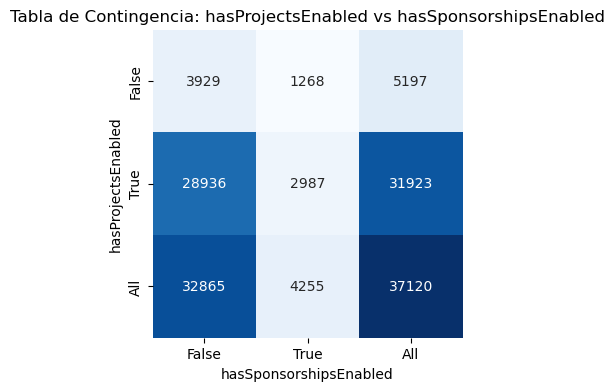

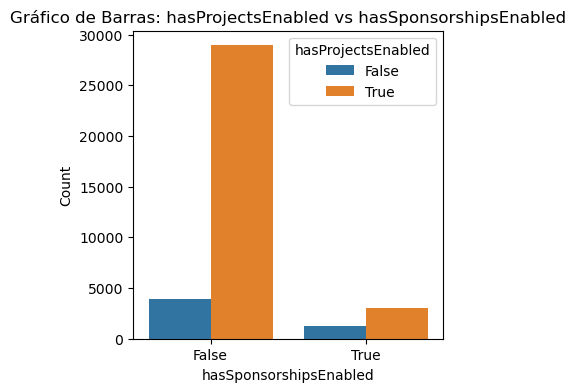


Tabla de contingencia entre hasProjectsEnabled y primaryLanguage.name:

primaryLanguage.name  1C Enterprise  ABAP  AGS Script  AL  ASL  ASP  ASP.NET  \
hasProjectsEnabled                                                             
False                             1     0           0   1    2    1        0   
True                              0     1           5   0    9    1        1   
All                               1     1           5   1   11    2        1   

primaryLanguage.name  ActionScript  Ada  Adblock Filter List  ...  Yul  ZAP  \
hasProjectsEnabled                                            ...             
False                            0    0                    1  ...    0    0   
True                             2    2                    1  ...    1    2   
All                              2    2                    2  ...    1    2   

primaryLanguage.name  ZIL  Zeek  ZenScript  Zig  jq  mcfunction  nesC    All  
hasProjectsEnabled                                 

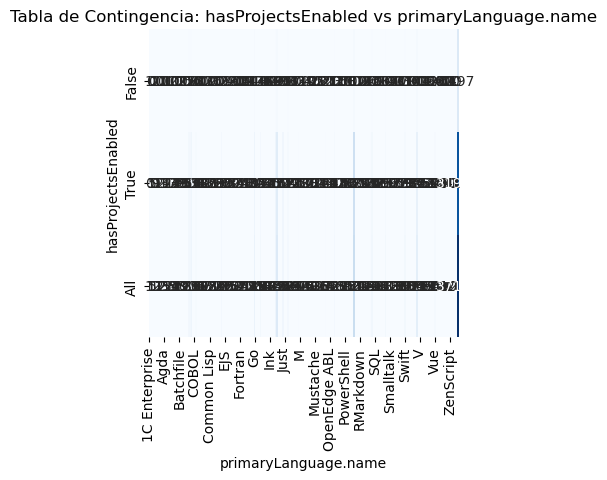

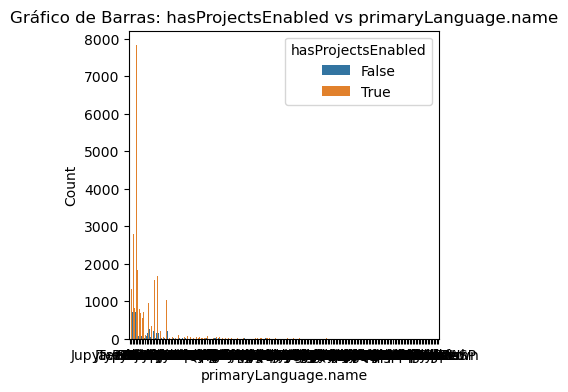


Tabla de contingencia entre hasProjectsEnabled y mergeCommitAllowed:

mergeCommitAllowed  False   True    All
hasProjectsEnabled                     
False                1262   3935   5197
True                 1735  30188  31923
All                  2997  34123  37120


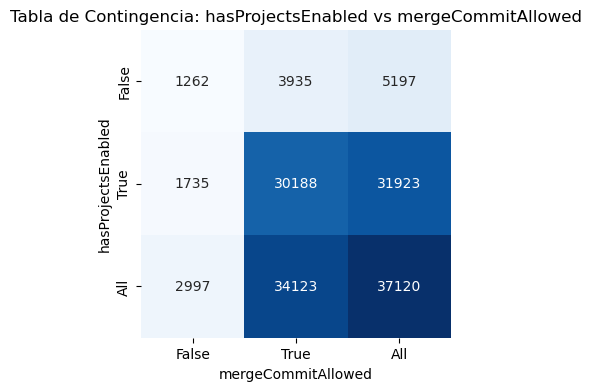

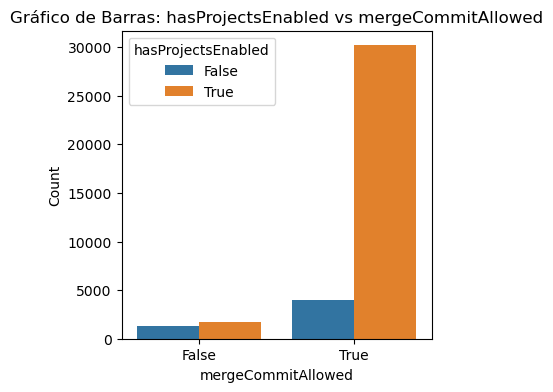


Tabla de contingencia entre hasProjectsEnabled y hasWikiEnabled:

hasWikiEnabled      False   True    All
hasProjectsEnabled                     
False                4267    930   5197
True                 2516  29407  31923
All                  6783  30337  37120


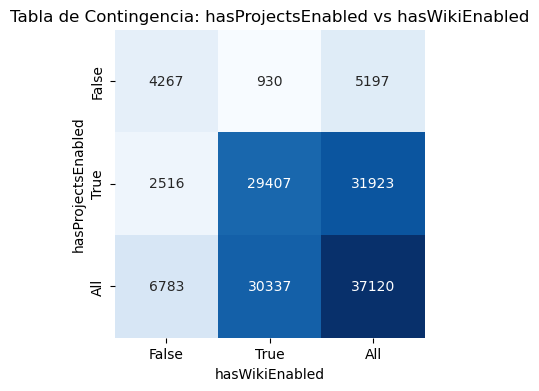

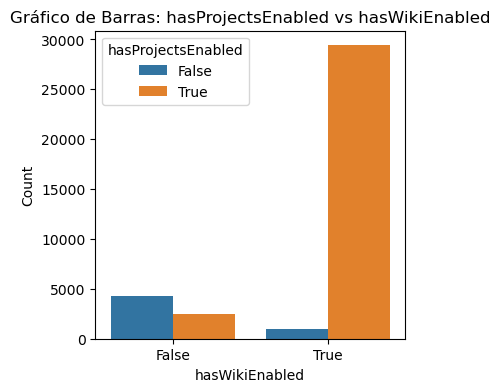


Tabla de contingencia entre isInOrganization y hasSponsorshipsEnabled:

hasSponsorshipsEnabled  False  True    All
isInOrganization                          
False                   21638  3027  24665
True                    11227  1228  12455
All                     32865  4255  37120


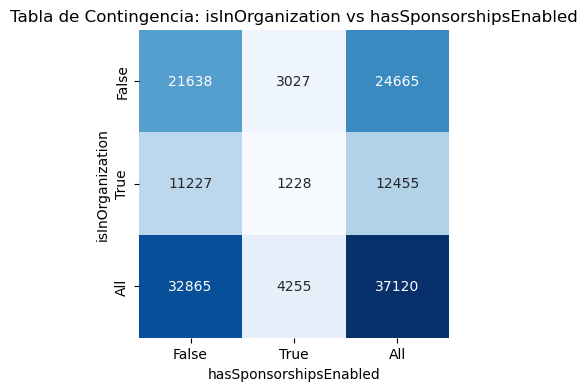

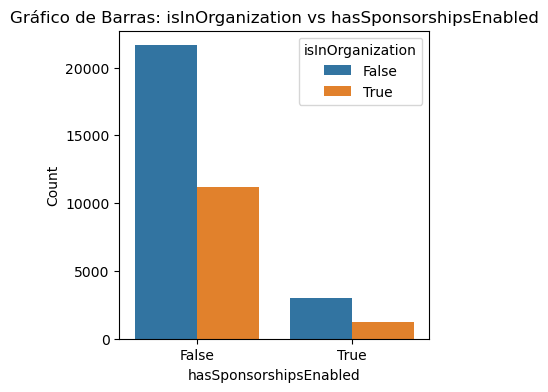


Tabla de contingencia entre isInOrganization y primaryLanguage.name:

primaryLanguage.name  1C Enterprise  ABAP  AGS Script  AL  ASL  ASP  ASP.NET  \
isInOrganization                                                               
False                             0     0           2   0    8    2        1   
True                              1     1           3   1    3    0        0   
All                               1     1           5   1   11    2        1   

primaryLanguage.name  ActionScript  Ada  Adblock Filter List  ...  Yul  ZAP  \
isInOrganization                                              ...             
False                            2    2                    1  ...    0    2   
True                             0    0                    1  ...    1    0   
All                              2    2                    2  ...    1    2   

primaryLanguage.name  ZIL  Zeek  ZenScript  Zig  jq  mcfunction  nesC    All  
isInOrganization                                     

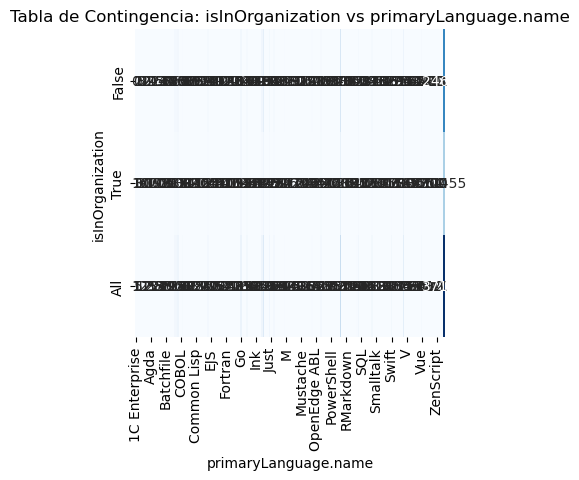

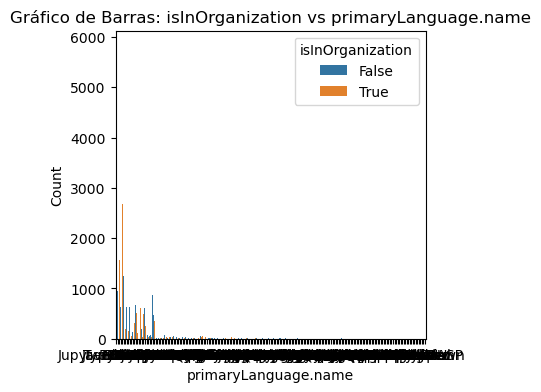


Tabla de contingencia entre isInOrganization y mergeCommitAllowed:

mergeCommitAllowed  False   True    All
isInOrganization                       
False                 969  23696  24665
True                 2028  10427  12455
All                  2997  34123  37120


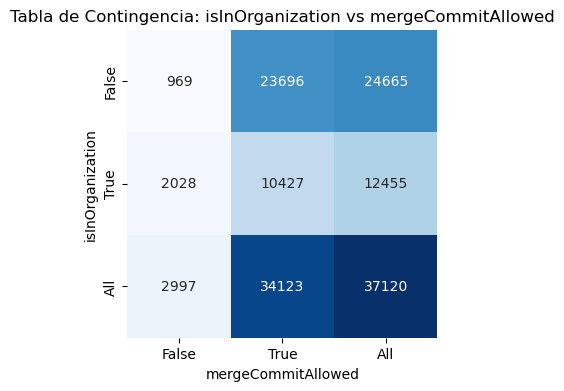

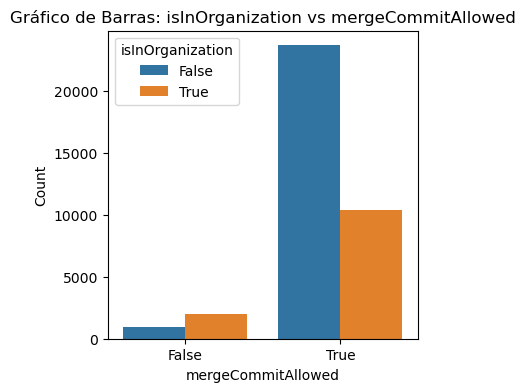


Tabla de contingencia entre isInOrganization y hasWikiEnabled:

hasWikiEnabled    False   True    All
isInOrganization                     
False              3289  21376  24665
True               3494   8961  12455
All                6783  30337  37120


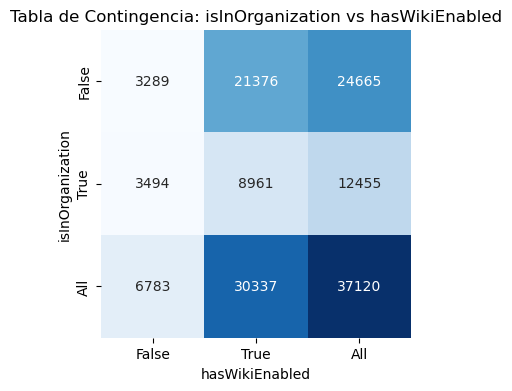

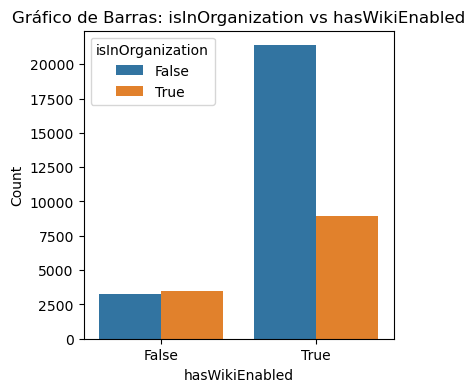


Tabla de contingencia entre hasSponsorshipsEnabled y primaryLanguage.name:

primaryLanguage.name    1C Enterprise  ABAP  AGS Script  AL  ASL  ASP  \
hasSponsorshipsEnabled                                                  
False                               0     1           5   1    9    1   
True                                1     0           0   0    2    1   
All                                 1     1           5   1   11    2   

primaryLanguage.name    ASP.NET  ActionScript  Ada  Adblock Filter List  ...  \
hasSponsorshipsEnabled                                                   ...   
False                         1             2    2                    2  ...   
True                          0             0    0                    0  ...   
All                           1             2    2                    2  ...   

primaryLanguage.name    Yul  ZAP  ZIL  Zeek  ZenScript  Zig  jq  mcfunction  \
hasSponsorshipsEnabled                                                       

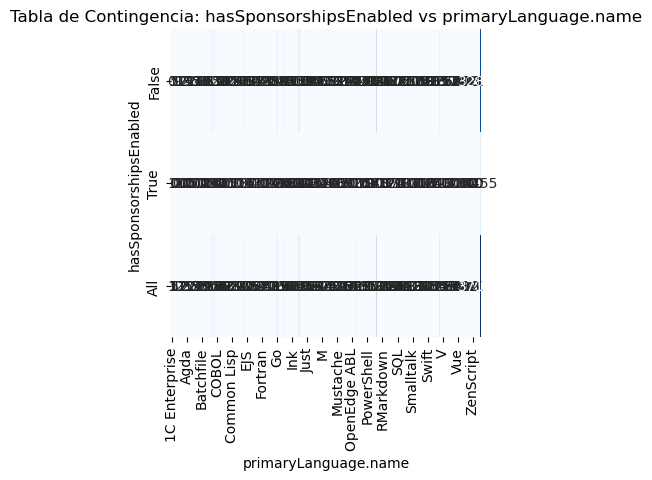

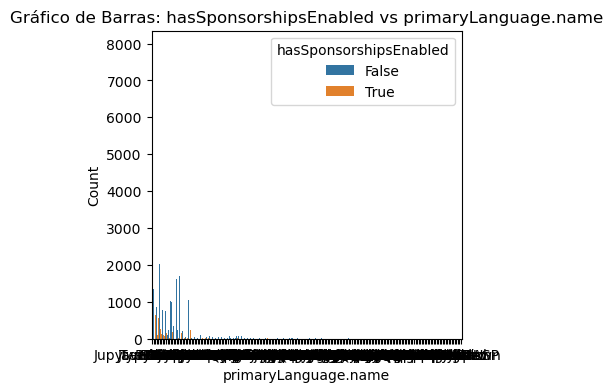


Tabla de contingencia entre hasSponsorshipsEnabled y mergeCommitAllowed:

mergeCommitAllowed      False   True    All
hasSponsorshipsEnabled                     
False                    2441  30424  32865
True                      556   3699   4255
All                      2997  34123  37120


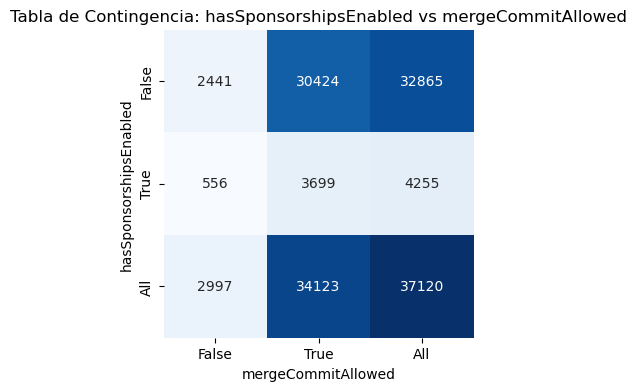

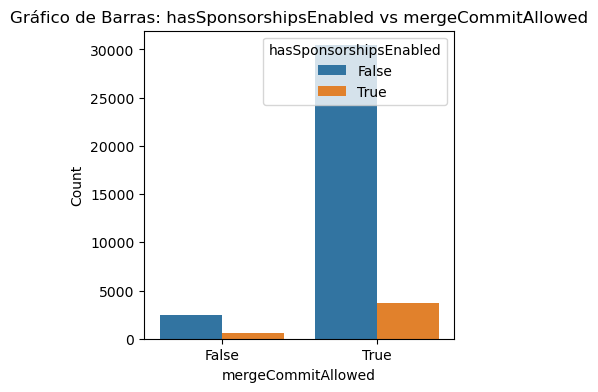


Tabla de contingencia entre hasSponsorshipsEnabled y hasWikiEnabled:

hasWikiEnabled          False   True    All
hasSponsorshipsEnabled                     
False                    5183  27682  32865
True                     1600   2655   4255
All                      6783  30337  37120


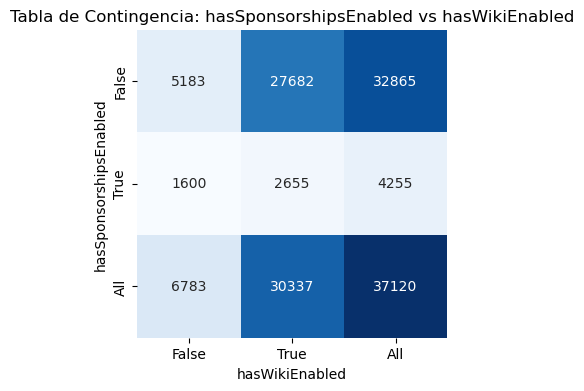

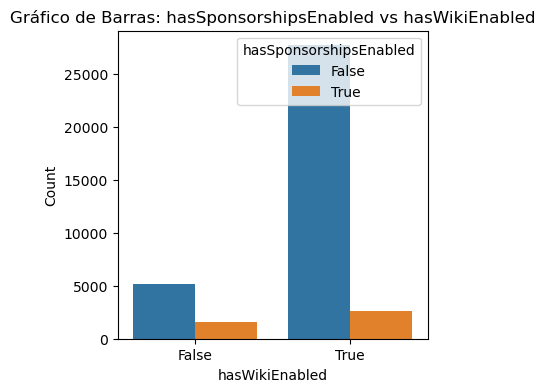


Tabla de contingencia entre primaryLanguage.name y mergeCommitAllowed:

mergeCommitAllowed    False   True    All
primaryLanguage.name                     
1C Enterprise             0      1      1
ABAP                      0      1      1
AGS Script                0      5      5
AL                        1      0      1
ASL                       1     10     11
...                     ...    ...    ...
Zig                       3     14     17
jq                        0      2      2
mcfunction                0      1      1
nesC                      0      1      1
All                    2997  34123  37120

[206 rows x 3 columns]


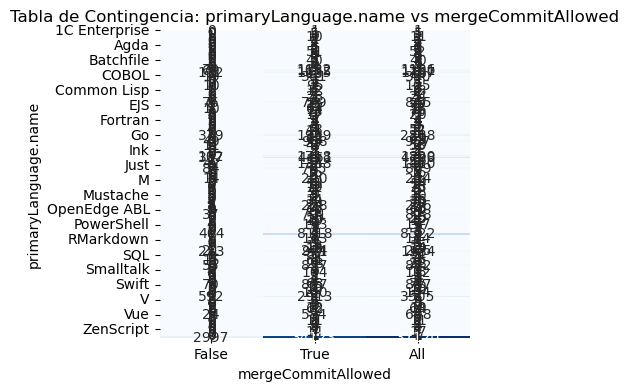

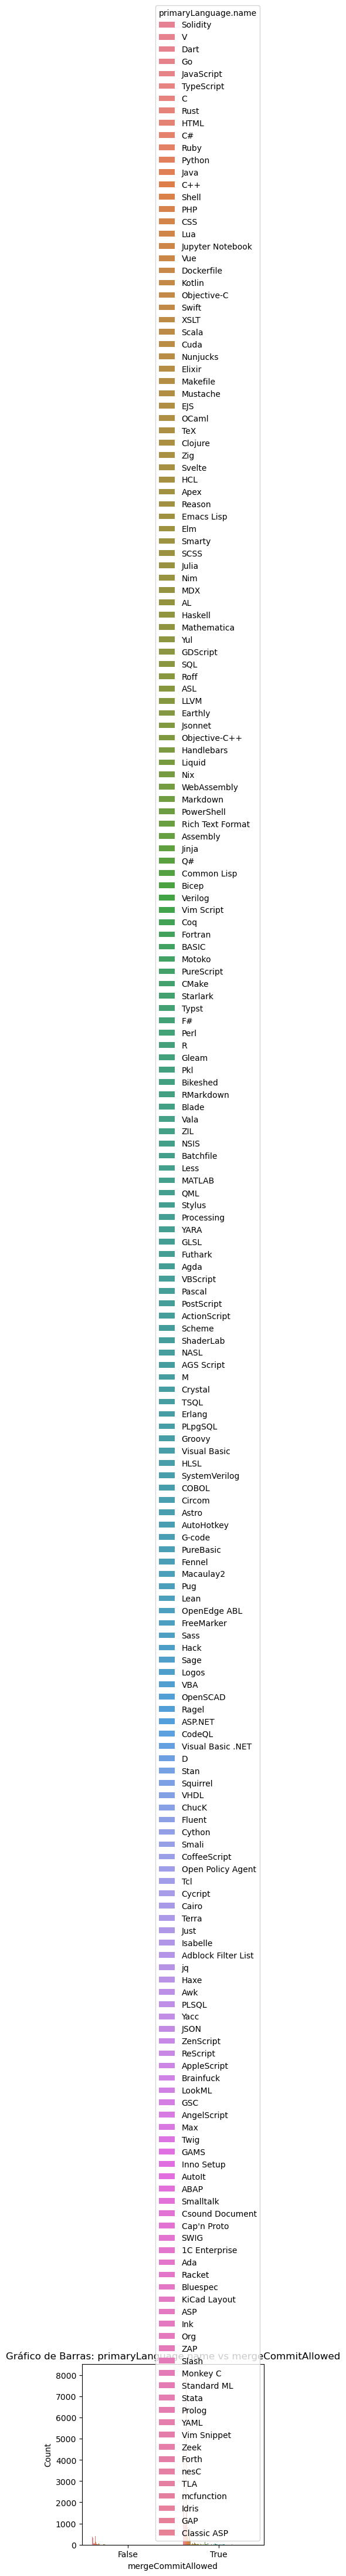


Tabla de contingencia entre primaryLanguage.name y hasWikiEnabled:

hasWikiEnabled        False   True    All
primaryLanguage.name                     
1C Enterprise             0      1      1
ABAP                      0      1      1
AGS Script                0      5      5
AL                        0      1      1
ASL                       2      9     11
...                     ...    ...    ...
Zig                       3     14     17
jq                        1      1      2
mcfunction                0      1      1
nesC                      0      1      1
All                    6783  30337  37120

[206 rows x 3 columns]


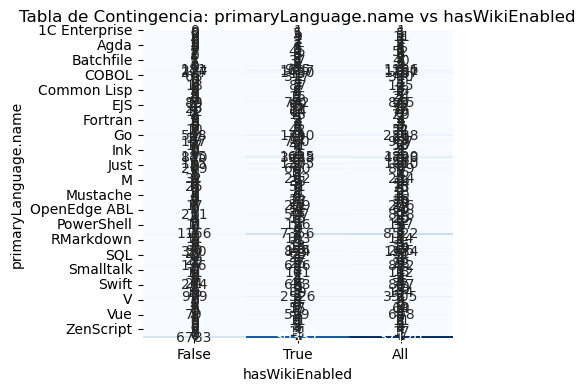

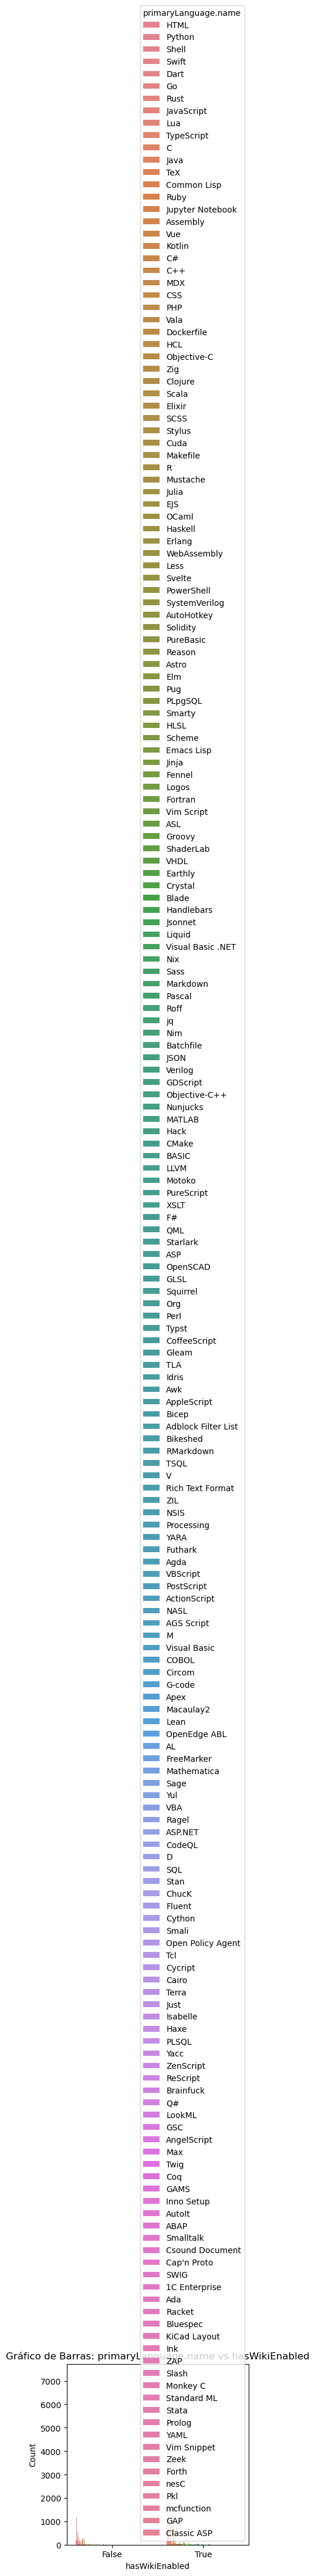


Tabla de contingencia entre mergeCommitAllowed y hasWikiEnabled:

hasWikiEnabled      False   True    All
mergeCommitAllowed                     
False                1631   1366   2997
True                 5152  28971  34123
All                  6783  30337  37120


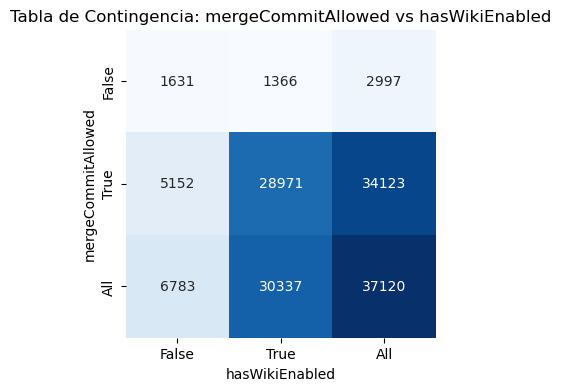

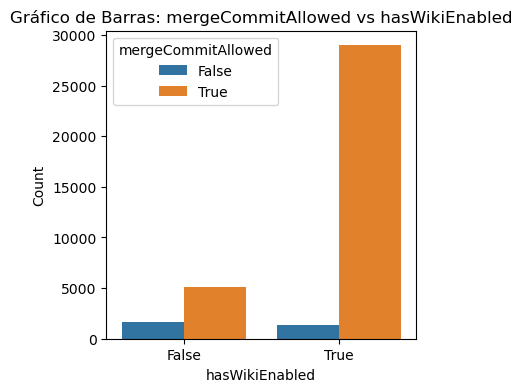

In [45]:
# otras pruebas. Esto es infinito.


# Variables a analizar
variables = [
    'hasProjectsEnabled',
    'isInOrganization',
    'hasSponsorshipsEnabled',
    'primaryLanguage.name',
    'mergeCommitAllowed',
    'hasWikiEnabled'
]

# Función para crear y mostrar tablas de contingencia y gráficos
def explorar_relaciones(df, vars):
    for i in range(len(vars)):
        for j in range(i + 1, len(vars)):
            # Crear tabla de contingencia
            tabla_contingencia = pd.crosstab(df[vars[i]], df[vars[j]], margins=True)
            print(f"\nTabla de contingencia entre {vars[i]} y {vars[j]}:\n")
            print(tabla_contingencia)
            
            # Gráfico de mosaico
            plt.figure(figsize=(4, 4))
            sns.heatmap(tabla_contingencia, annot=True, fmt='g', cmap='Blues', cbar=False)
            plt.title(f'Tabla de Contingencia: {vars[i]} vs {vars[j]}')
            plt.xlabel(vars[j])
            plt.ylabel(vars[i])
            plt.show()

            # Gráfico de barras para una mejor visualización
            plt.figure(figsize=(4, 4))
            sns.countplot(data=df, x=vars[j], hue=vars[i])
            plt.title(f'Gráfico de Barras: {vars[i]} vs {vars[j]}')
            plt.xlabel(vars[j])
            plt.ylabel('Count')
            plt.legend(title=vars[i])
            plt.show()

# Ejecutar la función para explorar relaciones
explorar_relaciones(df_copy, variables)


In [46]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37120 entries, 0 to 37119
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   name                        37120 non-null  object             
 1   description                 35030 non-null  object             
 2   stargazerCount              37120 non-null  int64              
 3   forkCount                   37120 non-null  int64              
 4   createdAt                   37120 non-null  datetime64[ns, UTC]
 5   updatedAt                   37120 non-null  datetime64[ns, UTC]
 6   pushedAt                    37120 non-null  datetime64[ns, UTC]
 7   diskUsage                   37120 non-null  int64              
 8   isArchived                  37120 non-null  bool               
 9   isEmpty                     37120 non-null  bool               
 10  isFork                      37120 non-null  bool          

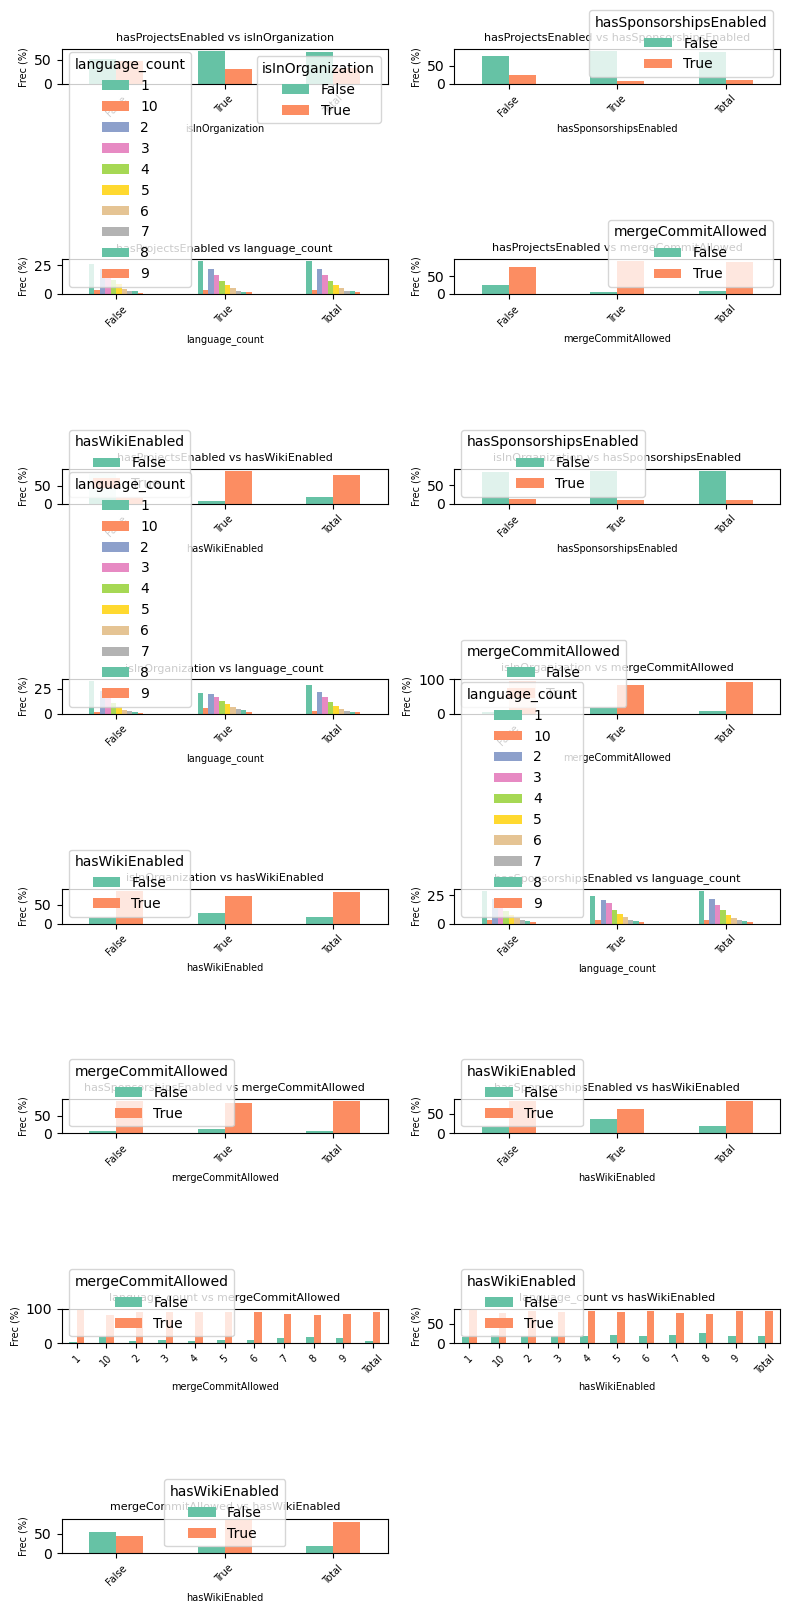

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools  # Asegúrate de importar itertools

# Variables a analizar
variables = [
    'hasProjectsEnabled',
    'isInOrganization',
    'hasSponsorshipsEnabled',
    'language_count',
    'mergeCommitAllowed',
    'hasWikiEnabled'
]

# Función para crear tablas de contingencia y calcular frecuencias relativas
def explorar_relaciones_frecuencias(df, vars):
    # Generar todas las combinaciones de pares de variables
    combinaciones = list(itertools.combinations(vars, 2))
    num_combinaciones = len(combinaciones)  # Definir el número de combinaciones
    
    # Configuración para el tamaño de los gráficos
    plt.figure(figsize=(8, 2 * (num_combinaciones // 2 + num_combinaciones % 2)))  # Ajusta la figura más pequeña

    # Contador para subgráficos
    plot_count = 1
    
    for var1, var2 in combinaciones:
        # Asegurarse de que los datos sean del tipo correcto
        df[var1] = df[var1].astype(str)
        df[var2] = df[var2].astype(str)

        # Crear tabla de contingencia
        tabla_contingencia = pd.crosstab(df[var1], df[var2], margins=False)
        
        # Añadir totales a la tabla de frecuencias absolutas
        tabla_contingencia.loc['Total'] = tabla_contingencia.sum()

        # Mostrar tabla de frecuencias absolutas
        #print(f"\nTabla de frecuencias absolutas entre {var1} y {var2}:\n")
        #print(tabla_contingencia)

        # Calcular las frecuencias relativas para el gráfico
        frecuencias_relativas = tabla_contingencia.div(tabla_contingencia.sum(axis=1), axis=0) * 100

        # Mostrar tabla de frecuencias relativas
        #print(f"\nFrecuencias Relativas entre {var1} y {var2} (en porcentaje):\n")
        #print(frecuencias_relativas)

        # Crear gráfico de barras (frecuencia relativa)
        plt.subplot((num_combinaciones + 1) // 2, 2, plot_count)  # 2 columnas

        # Graficar las frecuencias relativas
        frecuencias_relativas.plot(kind='bar', stacked=False, ax=plt.gca(), color=sns.color_palette('Set2'))

        # Títulos y etiquetas
        plt.title(f'{var1} vs {var2}', fontsize=8)  # Tamaño de fuente para el título
        plt.xlabel(var2, fontsize=7)  # Tamaño de fuente para el eje x
        plt.ylabel('Frec (%)', fontsize=7)  # Tamaño de fuente para el eje y
        plt.xticks(rotation=45, fontsize=7)  # Rotar etiquetas del eje x y ajustar tamaño de fuente

        # Incrementar el contador de subgráficos
        plot_count += 1

    # Ajustar el layout para evitar superposición de etiquetas
    plt.tight_layout()
    plt.show()

# Ejecutar la función para explorar relaciones
explorar_relaciones_frecuencias(df_copy, variables)


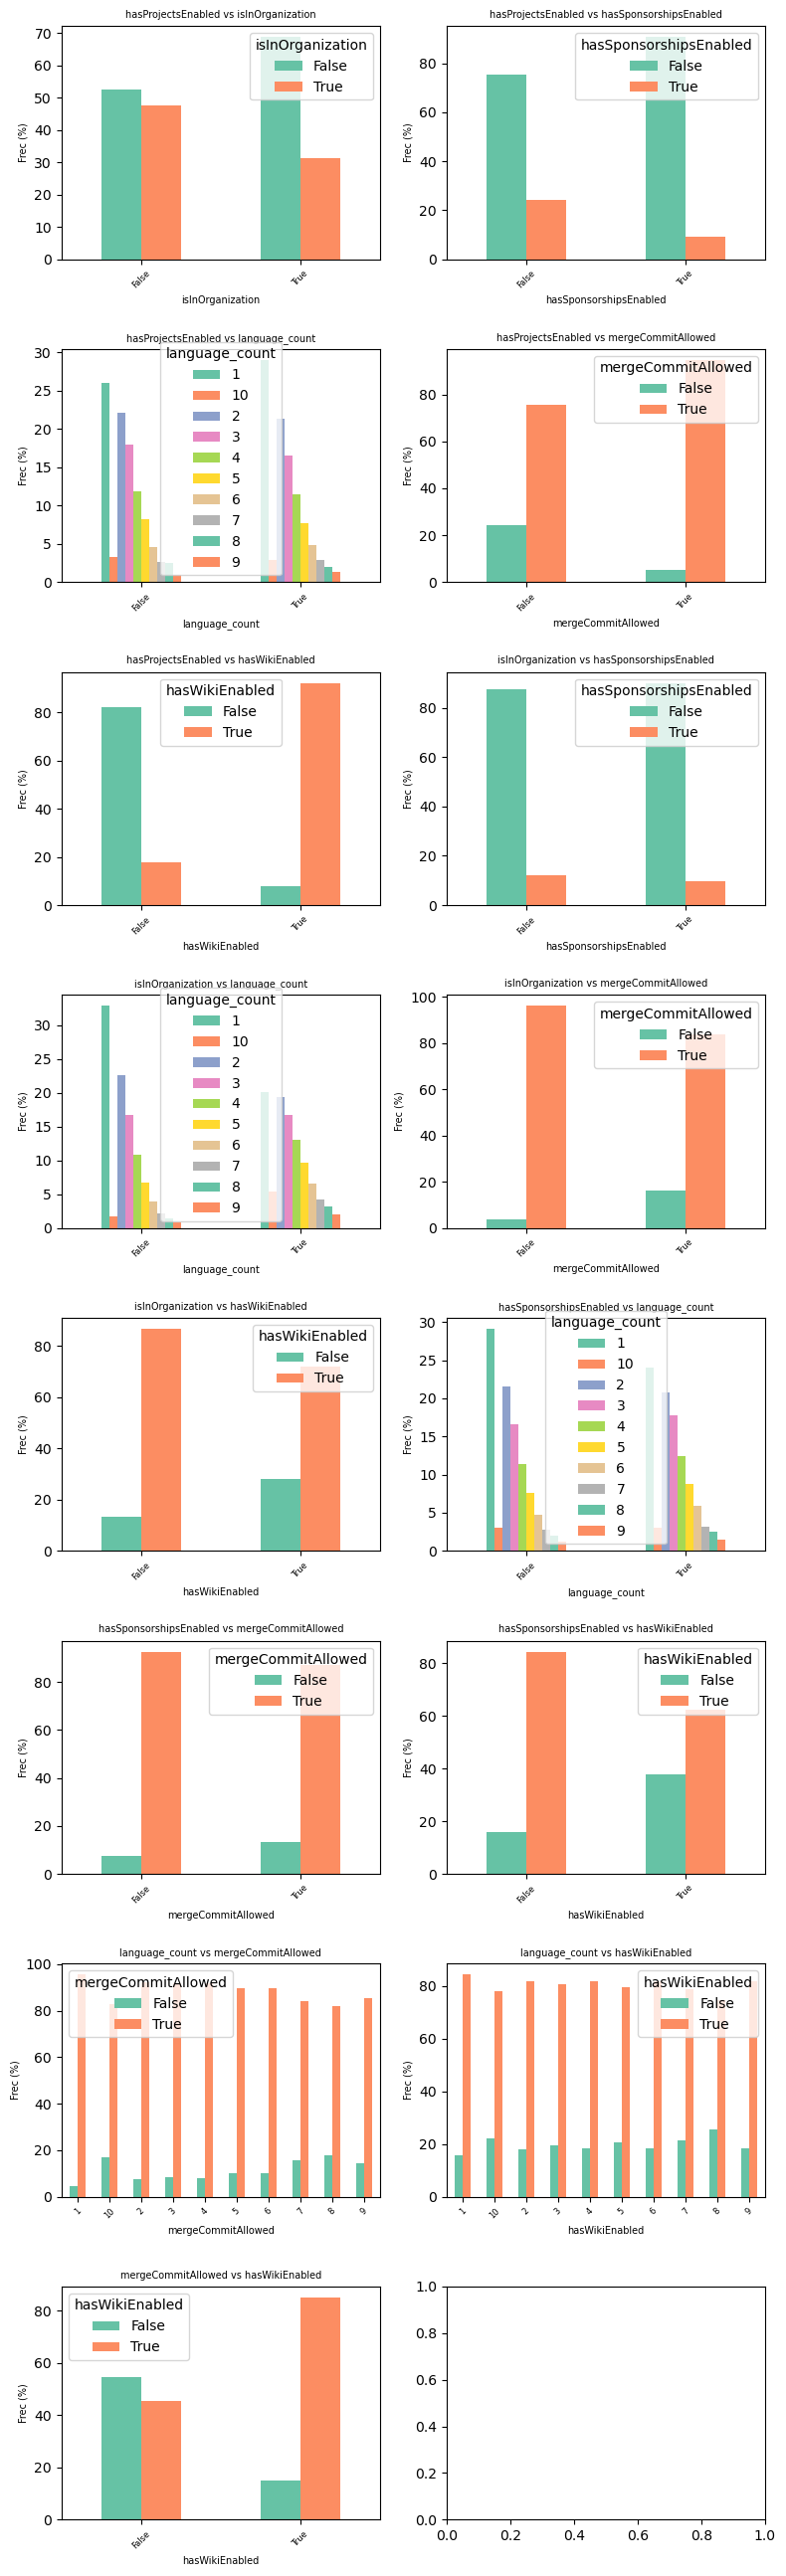

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools  # Asegúrate de importar itertools

# Variables a analizar
variables = [
    'hasProjectsEnabled',
    'isInOrganization',
    'hasSponsorshipsEnabled',
    'language_count',
    'mergeCommitAllowed',
    'hasWikiEnabled'
]

# Función para crear tablas de contingencia y calcular frecuencias relativas
def explorar_relaciones_frecuencias(df, vars):
    # Generar todas las combinaciones de pares de variables
    combinaciones = list(itertools.combinations(vars, 2))
    num_combinaciones = len(combinaciones)

    # Crear figura y ejes para el grid
    fig, axs = plt.subplots(nrows=8, ncols=2, figsize=(8, 26))  # 2 columnas y 8 filas

    for plot_count, (var1, var2) in enumerate(combinaciones):
        # Asegurarse de que los datos sean del tipo correcto
        df[var1] = df[var1].astype(str)
        df[var2] = df[var2].astype(str)

        # Crear tabla de contingencia
        tabla_contingencia = pd.crosstab(df[var1], df[var2], margins=False)

        # Calcular las frecuencias relativas para el gráfico
        frecuencias_relativas = tabla_contingencia.div(tabla_contingencia.sum(axis=1), axis=0) * 100

        # Obtener la posición del gráfico
        row = plot_count // 2
        col = plot_count % 2
        
        # Graficar las frecuencias relativas
        frecuencias_relativas.plot(kind='bar', stacked=False, ax=axs[row, col], color=sns.color_palette('Set2'))

        # Títulos y etiquetas
        axs[row, col].set_title(f'{var1} vs {var2}', fontsize=7)  # Tamaño de fuente para el título
        axs[row, col].set_xlabel(var2, fontsize=7)  # Tamaño de fuente para el eje x
        axs[row, col].set_ylabel('Frec (%)', fontsize=7)  # Tamaño de fuente para el eje y
        axs[row, col].tick_params(axis='x', rotation=45, labelsize=6)  # Rotar etiquetas del eje x y ajustar tamaño de fuente

    # Ajustar el layout para evitar superposición de etiquetas
    plt.tight_layout()
    plt.show()

# Ejecutar la función para explorar relaciones
explorar_relaciones_frecuencias(df_copy, variables)
